# Contextual Bandits Agent with Policy Gradient Method (Stochastic) in Prediction Markets Problem
---
This is a program that simulates an agent who trades in a prediction market. The problem that the prediction market aims to solve is to predict the real distribution of a random variable. We define the random variable as the colour of a bucket. The problem design comes from a human-subjective experiment for decision markets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import traceback
from tqdm.notebook import tnrange
from scipy.special import logit, expit
from PolicyGradientAgent import StochasticGradientAgent
from Environment import PredictionMarket, Bucket, one_hot_encode, bucket_colour_to_num, not_outlier

In [228]:
learning_rate_theta = 1e-3
learning_rate_wv = 0 #1e-4
memory_size = 2**12
batch_size = 2**12
training_episodes = 30000
decay_rate = 0
beta1 = 0.9
beta2 = 0.9999
# Algorithm: adam, momentum, regular
algorithm = 'regular'
learning_std = False
fixed_std = 0.3



agent = StochasticGradientAgent(feature_shape=[1, 3], learning_rate_theta=learning_rate_theta, 
                                learning_rate_wv=learning_rate_wv, 
                                memory_size= memory_size, batch_size=batch_size,
                                beta1=beta1, beta2=beta2, 
                                learning_std=learning_std, fixed_std=fixed_std)


reward_history_list = []
average_reward = 0

mean_weights_history_list = []
std_weights_history_list = []

r_ball_mean_history_list = []
b_ball_mean_history_list = []
r_ball_std_history_list = []
b_ball_std_history_list = []

r_ball_pred_history_list = []
b_ball_pred_history_list = []

grad_r_ball_mean_history_list = []
grad_b_ball_mean_history_list = []
grad_r_ball_std_history_list = []
grad_b_ball_std_history_list = []

grad_r_ball_v_mean_history_list = []
grad_b_ball_v_mean_history_list = []
grad_r_ball_v_std_history_list = []
grad_b_ball_v_std_history_list = []

grad_r_ball_adam_mean_history_list = []
grad_b_ball_adam_mean_history_list = []
grad_r_ball_adam_std_history_list = []
grad_b_ball_adam_std_history_list = []

for t in tnrange(training_episodes):
    prior_red = 0.5
    bucket = Bucket(prior_red)
    pm = PredictionMarket(outcomes_list=['red_bucket', 'blue_bucket'])
    signal = bucket.signal()
    x = one_hot_encode(signal)
    x.append(prior_red)
    h, mean, std = agent.report(x)
    pi = expit(h)
    report = [pi, 1 - pi]

    pm.report(report)
    R = pm.log_resolve(bucket_colour_to_num[bucket.colour])
    
    average_reward = average_reward + (1/ (t + 1)) * (R - average_reward)
    
    mean_weights_history_list.append(agent.theta_mean[0].tolist())
    std_weights_history_list.append(agent.theta_std[0].tolist())
    
    R_perf = 0
    red_score = np.log(report[0]) - np.log(0.5)
    blue_score = np.log(report[1]) - np.log(0.5)
    red_expectation = 2/3  * red_score + 1/3  * blue_score
    blue_expectation = 1/3  * red_score + 2/3  * blue_score
    if signal == 'red':
        R_perf = red_expectation
    else:
        R_perf = blue_expectation


    v = agent.store_experience(x, h, mean, std, R, t)
    
    reward_history_list.append([R, average_reward, v])
    try:
        grad_mean, grad_std, v_dw_mean_corrected, v_dw_std_corrected, \
        s_dw_mean_corrected, s_dw_std_corrected = agent.batch_update(t, algorithm= algorithm)
    except AssertionError:
        tb = traceback.format_exc()
        print(tb)

    agent.learning_rate_decay(epoch=t, decay_rate=decay_rate)

    if signal == 'red':
        r_ball_pred_history_list.append(report[0])
        r_ball_mean_history_list.append(mean)
        r_ball_std_history_list.append(std)
       
    else:
        b_ball_pred_history_list.append(report[0])
        b_ball_mean_history_list.append(mean)
        b_ball_std_history_list.append(std)
        
    grad_r_ball_mean_history_list.append(grad_mean[0, 0])
    grad_r_ball_std_history_list.append(grad_std[0, 0])
    ##########
    grad_r_ball_v_mean_history_list.append(v_dw_mean_corrected[0, 0])
    grad_r_ball_v_std_history_list.append(v_dw_std_corrected[0, 0])
    grad_r_ball_adam_mean_history_list.append(s_dw_mean_corrected[0, 0])
    grad_r_ball_adam_std_history_list.append(s_dw_std_corrected[0, 0])        
    grad_b_ball_mean_history_list.append(grad_mean[0, 1])
    grad_b_ball_std_history_list.append(grad_std[0, 1])
    #########
    grad_b_ball_v_mean_history_list.append(v_dw_mean_corrected[0, 1])
    grad_b_ball_v_std_history_list.append(v_dw_std_corrected[0, 1])
    grad_b_ball_adam_mean_history_list.append(s_dw_mean_corrected[0, 1])
    grad_b_ball_adam_std_history_list.append(s_dw_std_corrected[0, 1])

  0%|          | 0/30000 [00:00<?, ?it/s]

Updating weights with regular algorithm.


In [229]:
reward_history = np.array(reward_history_list)

mean_weights_history = np.array(mean_weights_history_list)
std_weights_history = np.array(std_weights_history_list)

grad_r_ball_mean_history = np.array(grad_r_ball_mean_history_list)
grad_b_ball_mean_history = np.array(grad_b_ball_mean_history_list)
grad_r_ball_std_history = np.array(grad_r_ball_std_history_list)
grad_b_ball_std_history = np.array(grad_b_ball_std_history_list)

grad_r_ball_v_mean_history = np.array(grad_r_ball_v_mean_history_list)
grad_b_ball_v_mean_history = np.array(grad_b_ball_v_mean_history_list)
grad_r_ball_v_std_history = np.array(grad_r_ball_v_std_history_list)
grad_b_ball_v_std_history = np.array(grad_b_ball_v_std_history_list)

grad_r_ball_adam_mean_history = np.array(grad_r_ball_adam_mean_history_list)
grad_b_ball_adam_mean_history = np.array(grad_b_ball_adam_mean_history_list)
grad_r_ball_adam_std_history = np.array(grad_r_ball_adam_std_history_list)
grad_b_ball_adam_std_history = np.array(grad_b_ball_adam_std_history_list)

In [230]:
std

0.3

Towards best ratio:  0.7166136627963408


Text(0.5, 0.98, 'Actual Rewards and Average')

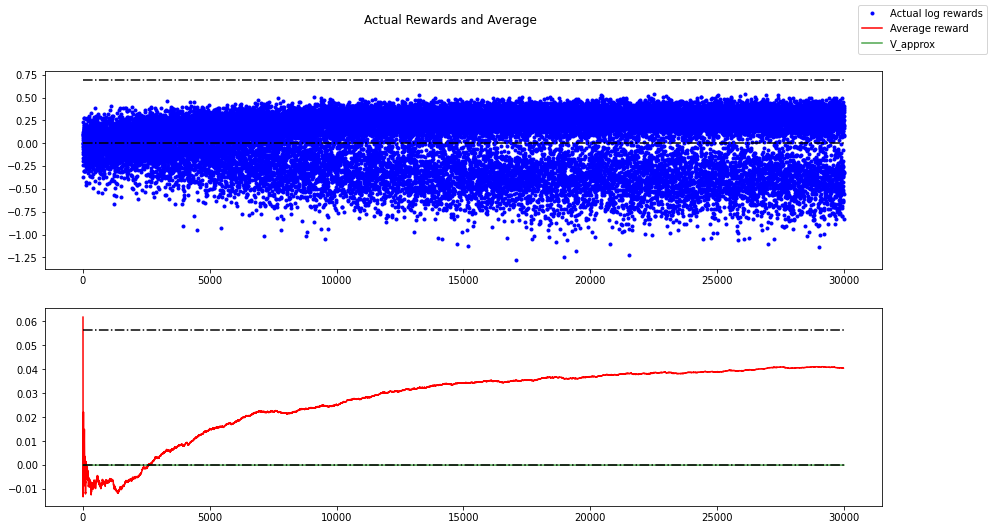

In [231]:
theoretical_best = 2/3*(np.log(2/3)-np.log(1/2)) + 1/3*(np.log(1/3)-np.log(1/2))
empirical_best = np.mean(reward_history[-100:, 1])
print('Towards best ratio: ', empirical_best/ theoretical_best)
fig, axs = plt.subplots(2, figsize=(15, 8))
axs[0].plot(reward_history[:, 0], 'b.',label = 'Actual log rewards', zorder=-100)
axs[1].plot(not_outlier(reward_history[:, 1]), 'r',zorder= -99, label = 'Average reward')
axs[0].hlines(y=np.log(2), xmin=0, xmax=reward_history.shape[0], colors='black', linestyles='dashdot')
axs[0].hlines(y=0.0, xmin=0, xmax=reward_history.shape[0] , colors='black', linestyles='dashdot')
axs[1].hlines(y=0.0, xmin=0, xmax=reward_history.shape[0] , colors='black', linestyles='dashdot')
axs[1].plot(reward_history[:, 2],'g', zorder= -98, label = 'V_approx', alpha = 0.7)
axs[1].hlines(y=theoretical_best, xmin=0, xmax=reward_history.shape[0] , colors='black', linestyles='dashdot')
fig.legend()
fig.suptitle('Actual Rewards and Average')

15139


Text(0.5, 1.0, 'Report')

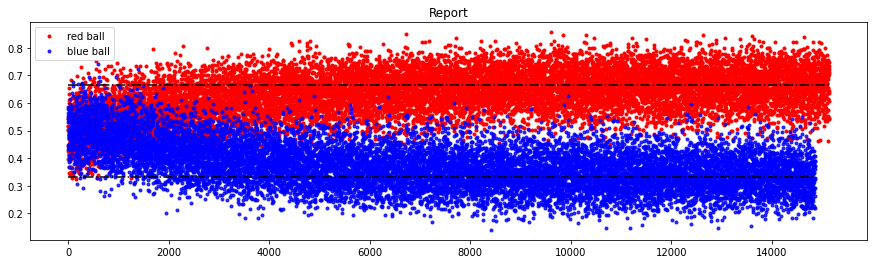

In [232]:
print(len(r_ball_pred_history_list))
fig = plt.figure(figsize=(15, 4))
plt.plot(r_ball_pred_history_list, 'r.',zorder=-100, label='red ball')
plt.plot(b_ball_pred_history_list, 'b.', zorder=-99, label = 'blue ball', alpha=0.8)
plt.hlines(y=2/3, xmin=0, xmax=len(r_ball_pred_history_list), colors='black', linestyles='dashdot')
plt.hlines(y=1/3, xmin=0, xmax=len(b_ball_pred_history_list) , colors='black', linestyles='dashdot')
plt.legend()
plt.title('Report')

Text(0.5, 1.0, 'Mean')

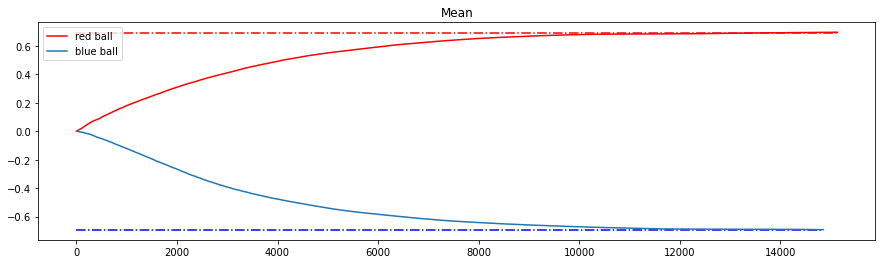

In [233]:
fig = plt.figure(figsize=(15, 4))
plt.plot(r_ball_mean_history_list, 'r', label = 'red ball')
plt.plot(b_ball_mean_history_list,label = 'blue ball')
plt.hlines(y=np.log(2), xmin=0, xmax=len(r_ball_mean_history_list), colors='red', linestyles='dashdot')
plt.hlines(y=np.log(1/2), xmin=0, xmax=len(b_ball_mean_history_list) , colors='blue', linestyles='dashdot')
plt.legend()
plt.title('Mean')

Text(0.5, 1.0, 'Weights for Mean')

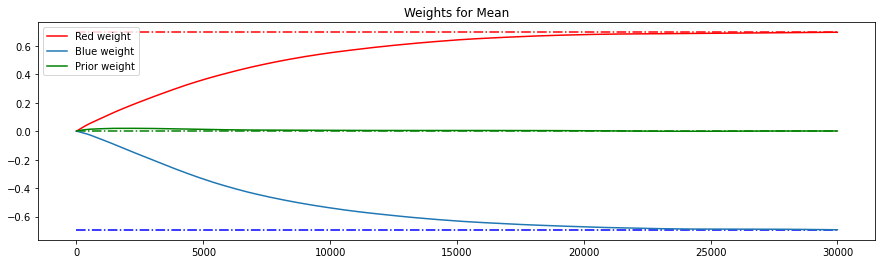

In [234]:
fig = plt.figure(figsize=(15, 4))
plt.plot(mean_weights_history[1:, 0], 'r', label='Red weight')
plt.plot(mean_weights_history[1:, 1], label='Blue weight')
plt.plot(mean_weights_history[1:, 2], 'g', label='Prior weight')
plt.hlines(y=np.log(2), xmin=0, xmax=len(mean_weights_history), colors='red', linestyles='dashdot')
plt.hlines(y=np.log(1/2), xmin=0, xmax=len(mean_weights_history) , colors='blue', linestyles='dashdot')
plt.hlines(y=0, xmin=0, xmax=len(mean_weights_history) , colors='green', linestyles='dashdot')
plt.legend()
plt.title('Weights for Mean')

In [235]:
if learning_std:
    min_std = min(r_ball_std_history_list) if min(r_ball_std_history_list) < min(b_ball_std_history_list) else min(b_ball_std_history_list)
    fig = plt.figure(figsize=(15, 4))
    plt.plot(r_ball_std_history_list, 'r', label = 'red ball')
    plt.plot(b_ball_std_history_list,label = 'blue ball')
    plt.hlines(y=0, xmin=0, xmax=len(b_ball_std_history_list) , colors='black', linestyles='dashdot')
    plt.hlines(y=min_std, xmin=0, xmax=len(b_ball_std_history_list) , colors='black', linestyles='dashdot', label=str(min_std))
    plt.legend()
    plt.title('Standard Diviation')

In [236]:
if learning_std:
    fig = plt.figure(figsize=(15, 4))
    plt.plot(std_weights_history[:, 0], 'r', label='Red weight')
    plt.plot(std_weights_history[:, 1], label='Blue weight')
    plt.plot(std_weights_history[:, 2], 'g', label='Prior weight')
    plt.legend()
    plt.title('Weights for standard diviation')

Text(0.5, 0.98, 'Signal Mean Gradients')

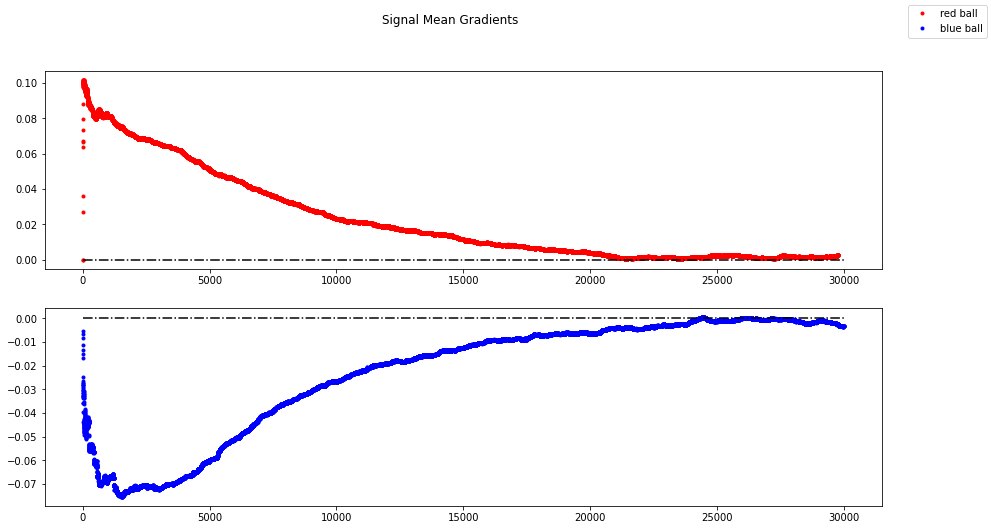

In [237]:
fig, axs = plt.subplots(2, figsize=(15, 8))
axs[0].plot(not_outlier(grad_r_ball_mean_history), 'r.', label = 'red ball', zorder=-100)
axs[1].plot(not_outlier(grad_b_ball_mean_history),'b.',label = 'blue ball', zorder=-100)
axs[0].hlines(y=0, xmin=0, xmax=grad_r_ball_mean_history.shape[0], colors='black', linestyles='dashdot')
axs[1].hlines(y=0, xmin=0, xmax=grad_b_ball_mean_history.shape[0], colors='black', linestyles='dashdot')
fig.legend()
fig.suptitle('Signal Mean Gradients')

Text(0.5, 0.98, 'Signal Mean Gradients (momentum)')

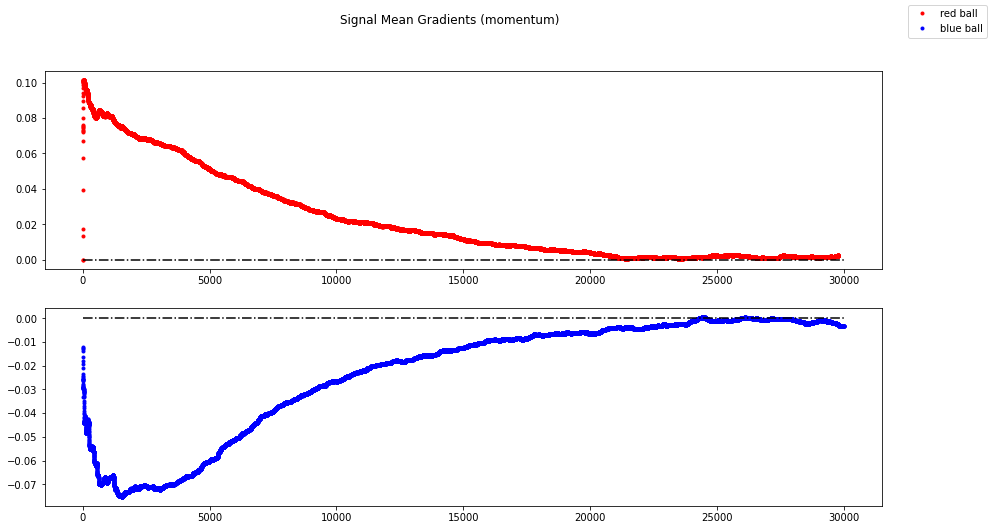

In [238]:
fig, axs = plt.subplots(2, figsize=(15, 8))
axs[0].plot(not_outlier(grad_r_ball_v_mean_history), 'r.', label = 'red ball', zorder=-100)
axs[1].plot(not_outlier(grad_b_ball_v_mean_history), 'b.',label = 'blue ball', zorder=-100)
axs[0].hlines(y=0, xmin=0, xmax=grad_r_ball_v_mean_history.shape[0], colors='black', linestyles='dashdot')
axs[1].hlines(y=0, xmin=0, xmax=grad_b_ball_v_mean_history.shape[0], colors='black', linestyles='dashdot')
fig.legend()
fig.suptitle('Signal Mean Gradients (momentum)')

Text(0.5, 0.98, 'Signal Mean Gradients (Adam)')

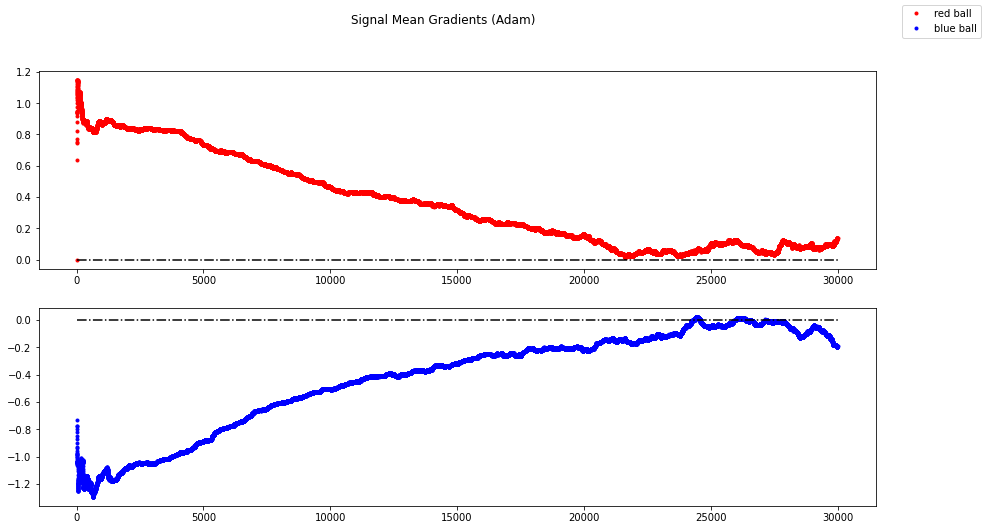

In [239]:
fig, axs = plt.subplots(2, figsize=(15, 8))
axs[0].plot(not_outlier(grad_r_ball_adam_mean_history), 'r.', label = 'red ball', zorder=-100)
axs[1].plot(not_outlier(grad_b_ball_adam_mean_history), 'b.',label = 'blue ball', zorder=-100)
axs[0].hlines(y=0, xmin=0, xmax=grad_r_ball_v_mean_history.shape[0], colors='black', linestyles='dashdot')
axs[1].hlines(y=0, xmin=0, xmax=grad_b_ball_v_mean_history.shape[0], colors='black', linestyles='dashdot')
fig.legend()
fig.suptitle('Signal Mean Gradients (Adam)')

In [240]:
# fig, axs = plt.subplots(2, figsize=(15, 8))
# axs[0].plot(not_outlier(grad_r_ball_mean_history[:, 2]), 'r.', label = 'red ball', zorder = -100)
# axs[1].plot(not_outlier(grad_b_ball_mean_history[:, 2]), 'b.',label = 'blue ball', zorder = -100)
# axs[0].hlines(y=0, xmin=0, xmax=grad_r_ball_mean_history.shape[0], colors='black', linestyles='dashdot')
# axs[1].hlines(y=0, xmin=0, xmax=grad_b_ball_mean_history.shape[0], colors='black', linestyles='dashdot')
# fig.legend()
# fig.suptitle('Prior Mean Gradient')

In [241]:
# fig, axs = plt.subplots(2, figsize=(15, 8))
# axs[0].plot(not_outlier(grad_r_ball_v_mean_history[:, 2]), 'r.', label = 'red ball', zorder = -100)
# axs[1].plot(not_outlier(grad_b_ball_v_mean_history[:, 2]),'b.',label = 'blue ball', zorder = -100)
# axs[0].hlines(y=0, xmin=0, xmax=grad_r_ball_v_mean_history.shape[0], colors='black', linestyles='dashdot')
# axs[1].hlines(y=0, xmin=0, xmax=grad_b_ball_v_mean_history.shape[0], colors='black', linestyles='dashdot')
# fig.legend()
# fig.suptitle('Prior Mean Gradient (Momentum)')

In [242]:
if learning_std:
    fig, axs = plt.subplots(2, figsize=(15, 8))
    axs[0].plot(not_outlier(grad_r_ball_std_history), 'r.', label = 'red ball', zorder = -100)
    axs[1].plot(not_outlier(grad_b_ball_std_history), 'b.',label = 'blue ball', zorder = -100)
    axs[0].hlines(y=0, xmin=0, xmax=grad_r_ball_std_history.shape[0], colors='black', linestyles='dashdot')
    axs[1].hlines(y=0, xmin=0, xmax=grad_b_ball_std_history.shape[0], colors='black', linestyles='dashdot')
    fig.legend()
    fig.suptitle('Signal Standard Diviation Gradient')

In [243]:
if learning_std:
    fig, axs = plt.subplots(2, figsize=(15, 8))
    axs[0].plot(not_outlier(grad_r_ball_v_std_history), 'r.', label = 'red ball', zorder = -100)
    axs[1].plot(not_outlier(grad_b_ball_v_std_history), 'b.',label = 'blue ball', zorder = -100)
    axs[0].hlines(y=0, xmin=0, xmax=grad_r_ball_v_std_history.shape[0], colors='black', linestyles='dashdot')
    axs[1].hlines(y=0, xmin=0, xmax=grad_b_ball_v_std_history.shape[0], colors='black', linestyles='dashdot')
    fig.legend()
    fig.suptitle('Signal Standard Diviation Gradient (Momentum)')

In [244]:
if learning_std:
    fig, axs = plt.subplots(2, figsize=(15, 8))
    axs[0].plot(not_outlier(grad_r_ball_adam_std_history), 'r.', label = 'red ball', zorder=-100)
    axs[1].plot(not_outlier(grad_b_ball_adam_std_history), 'b.',label = 'blue ball', zorder=-100)
    axs[0].hlines(y=0, xmin=0, xmax=grad_r_ball_v_std_history.shape[0], colors='black', linestyles='dashdot')
    axs[1].hlines(y=0, xmin=0, xmax=grad_b_ball_v_std_history.shape[0], colors='black', linestyles='dashdot')
    fig.legend()
    fig.suptitle('Signal Standard Diviation Gradient (Adam)')